<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

## Descripción del problema



In [1]:
import pandas as pd
import os
os.chdir("/media/enri/Mi_Proyecto/Ficheros_xlsx") 
df = pd.read_excel("Acatis.xlsx", sheet_name= "Sheet1", index_col="Date", 
                   parse_dates=["Date"], na_values='n/a' )
df[:3]

,Close
Date,
15/12/2008,100.00
16/12/2008,99.97
17/12/2008,99.96


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3040 entries, 15/12/2008 to  
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3038 non-null   float64
dtypes: float64(1)
memory usage: 47.5+ KB


Vemos que  **parse-dates = True**  no ha modificado el tipo de datos del índice

<AxesSubplot:title={'center':'Line Plot'}, xlabel='Date'>

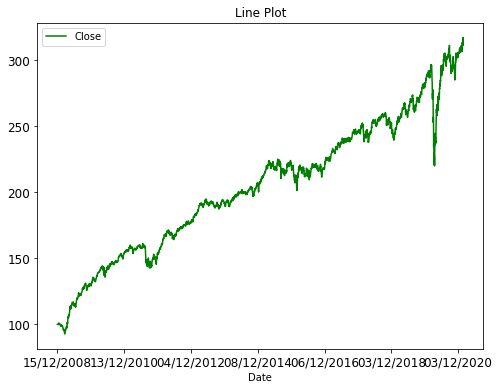

In [3]:
# Gráfico de linea
df.plot(figsize=(8, 6), color='green', title = 'Line Plot', fontsize=12)

Vemos que, a pesar de que el índice de las filas no es del tipo **datetime64[ns]**, la gráfica es correcta y en el eje **x** se muestran las fechas.

Como para operaciones posteriores, necesito que el tipo de datos del índice sea **datetime64[ns]**, procedo a cambiar el tipo de datos

In [13]:
df1 = df.copy(deep=True)
df1.reset_index(inplace=True)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3039 non-null   object 
 1   Close   3038 non-null   float64
dtypes: float64(1), object(1)
memory usage: 47.6+ KB


In [14]:
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3038 non-null   datetime64[ns]
 1   Close   3038 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 47.6 KB


In [15]:
# Volvemos a hacer índice la columna Date
df1.set_index("Date", inplace=True)

<AxesSubplot:title={'center':'Line Plot'}, xlabel='Date'>

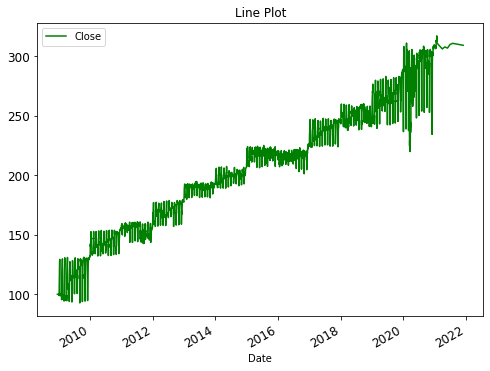

In [16]:
# Gráfico de linea
df1.plot(figsize=(8, 6), color='green', title = 'Line Plot', fontsize=12)

Vemos como la gráfica no es correcta si utilizamos el dataframe con el tipo de datos **datetime64[ns]** en el índice de las filas.